In [1]:
import numpy as np

def fractional_residual(z_measured, z_model):
    """
    This function computes the fractional residual of a given observed height and a model prediction.
    It takes in two parameters.
    
    Args:
        z_measured (float): measured height [in arcsec].
        z_model (float): model prediction of height[in arcsec].
        
    Returns:
        This function returns the fractional residual.
    """
    residual = (z_measured - z_model) / z_model
    return residual

In [25]:
import numpy as np
from scipy.optimize import curve_fit

def tapered_power_law(r_in, z0_in, Psi_in, r_taper_in, Phi_in):
    """
    This function computes the "tapered" power-law function.
    It takes in five parameters.
    
    Args:
        zo_in (float): input scale height [in arcsec].
        r_in (float): input list of the radii[in arcsec] we are observing.
        Psi_in (float): a unitless parameter.
        r_taper_in (float): input "tapered" radius [in arcsec].
        Phi_in (float): another unitless parameter.
        
    Returns:
        This function returns the height[in arcsec].
    """
    height_z = ((r_in) ** Psi_in) * z0_in * np.exp(np.sign((-(r_in / r_taper_in))) * (np.abs((-(r_in / r_taper_in)))) ** Phi_in)
    return height_z

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from diskprojection import disk_observation
from itertools import product

def best_fit_curve_and_datapoints(path_in, r_in, z0_in, Psi_in, r_taper_in, Phi_in, color_array_in):
    """
    This function plots best fit curves over datapoints.
    It takes in seven parameters.
    
    Args:
        path_in (str): name[no units] of directory holding the real ALMA observational images.
        zo_in (float/list): input scale height [in arcsec].
        r_in (float/list): input list of the radii[in arcsec] we are observing.
        Psi_in (float/list): a unitless parameter.
        r_taper_in (float/list): input "tapered" radius [in arcsec].
        Phi_in (float/list): another unitless parameter.
        color_array_in (list): input list of colors.
        
    Returns:
        This function returns nothing.
    """
    HD163296_molecule = disk_observation(path_in)
    r, z, Fnu, velocity, x, yf, yn = HD163296_molecule.get_emission_surface_v2(inc=46.7, PA=313.3, chans = [28, 98], r_max = 5, min_Fnu = 0.0025)
    fig = plt.figure(figsize=(100, 130))
    for index, velo in enumerate(np.unique(velocity)):
        if round(velo / 1000., 2) >= 6.26 and round(velo / 1000., 2) <= 7.86:
            rvals_tofit = r[np.where(velocity==velo)]
            zvals_tofit = z[np.where(velocity==velo)]
            i = 0
            ax = plt.subplot(7, 8, index+1)
            ax.scatter(rvals_tofit, zvals_tofit,s=2)
            ax.set_xlabel('r (arcsec)')
            ax.set_ylabel('z (arcsec)')
            ax.set_xlim(left = 0, right=5)
            ax.text(0.75, 0.9, "%.2f km/s" % (velo/1000.), transform=ax.transAxes)
            for count, value in enumerate(product(z0_in, Psi_in, r_taper_in, Phi_in)):
                popt, cov = HD163296_molecule.fit_emission_surface(rvals_tofit, zvals_tofit, curve_fit_kwargs = {'p0': np.array([value[0], value[1], value[2], value[3]])})
                ax.plot(r_in, tapered_power_law(r_in, popt[0], popt[1], popt[2], popt[3]), 'r--', color=color_array_in[i], label='z0 = ' + str(value[0]) + ' , ψ= ' + str(value[1]) + ' , r_taper = ' + str(value[2]) + ' , φ = ' + str(value[3]))
                i = i + 1
                ax.legend()
    plt.show()

Using -1.34 km/s to 12.66 km/s, and 0.00" to 5.00".
Rotating data cube...
Detecting peaks...


/usr/local/anaconda/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
<ipython-input-25-437d04988e8f>:19: RuntimeWarning: divide by zero encountered in power
  height_z = ((r_in) ** Psi_in) * z0_in * np.exp(np.sign((-(r_in / r_taper_in))) * (np.abs((-(r_in / r_taper_in)))) ** Phi_in)
<ipython-input-25-437d04988e8f>:19: RuntimeWarning: overflow encountered in power
  height_z = ((r_in) ** Psi_in) * z0_in * np.exp(np.sign((-(r_in / r_taper_in))) * (np.abs((-(r_in / r_taper_in)))) ** Phi_in)
<ipython-input-25-437d04988e8f>:19: RuntimeWarning: invalid value encountered in multiply
  height_z = ((r_in) ** Psi_in) * z0_in * np.exp(np.sign((-(r_in / r_taper_in))) * (np.abs((-(r_in / r_taper_in)))) ** Phi_in)
/usr/local/anaconda/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be es

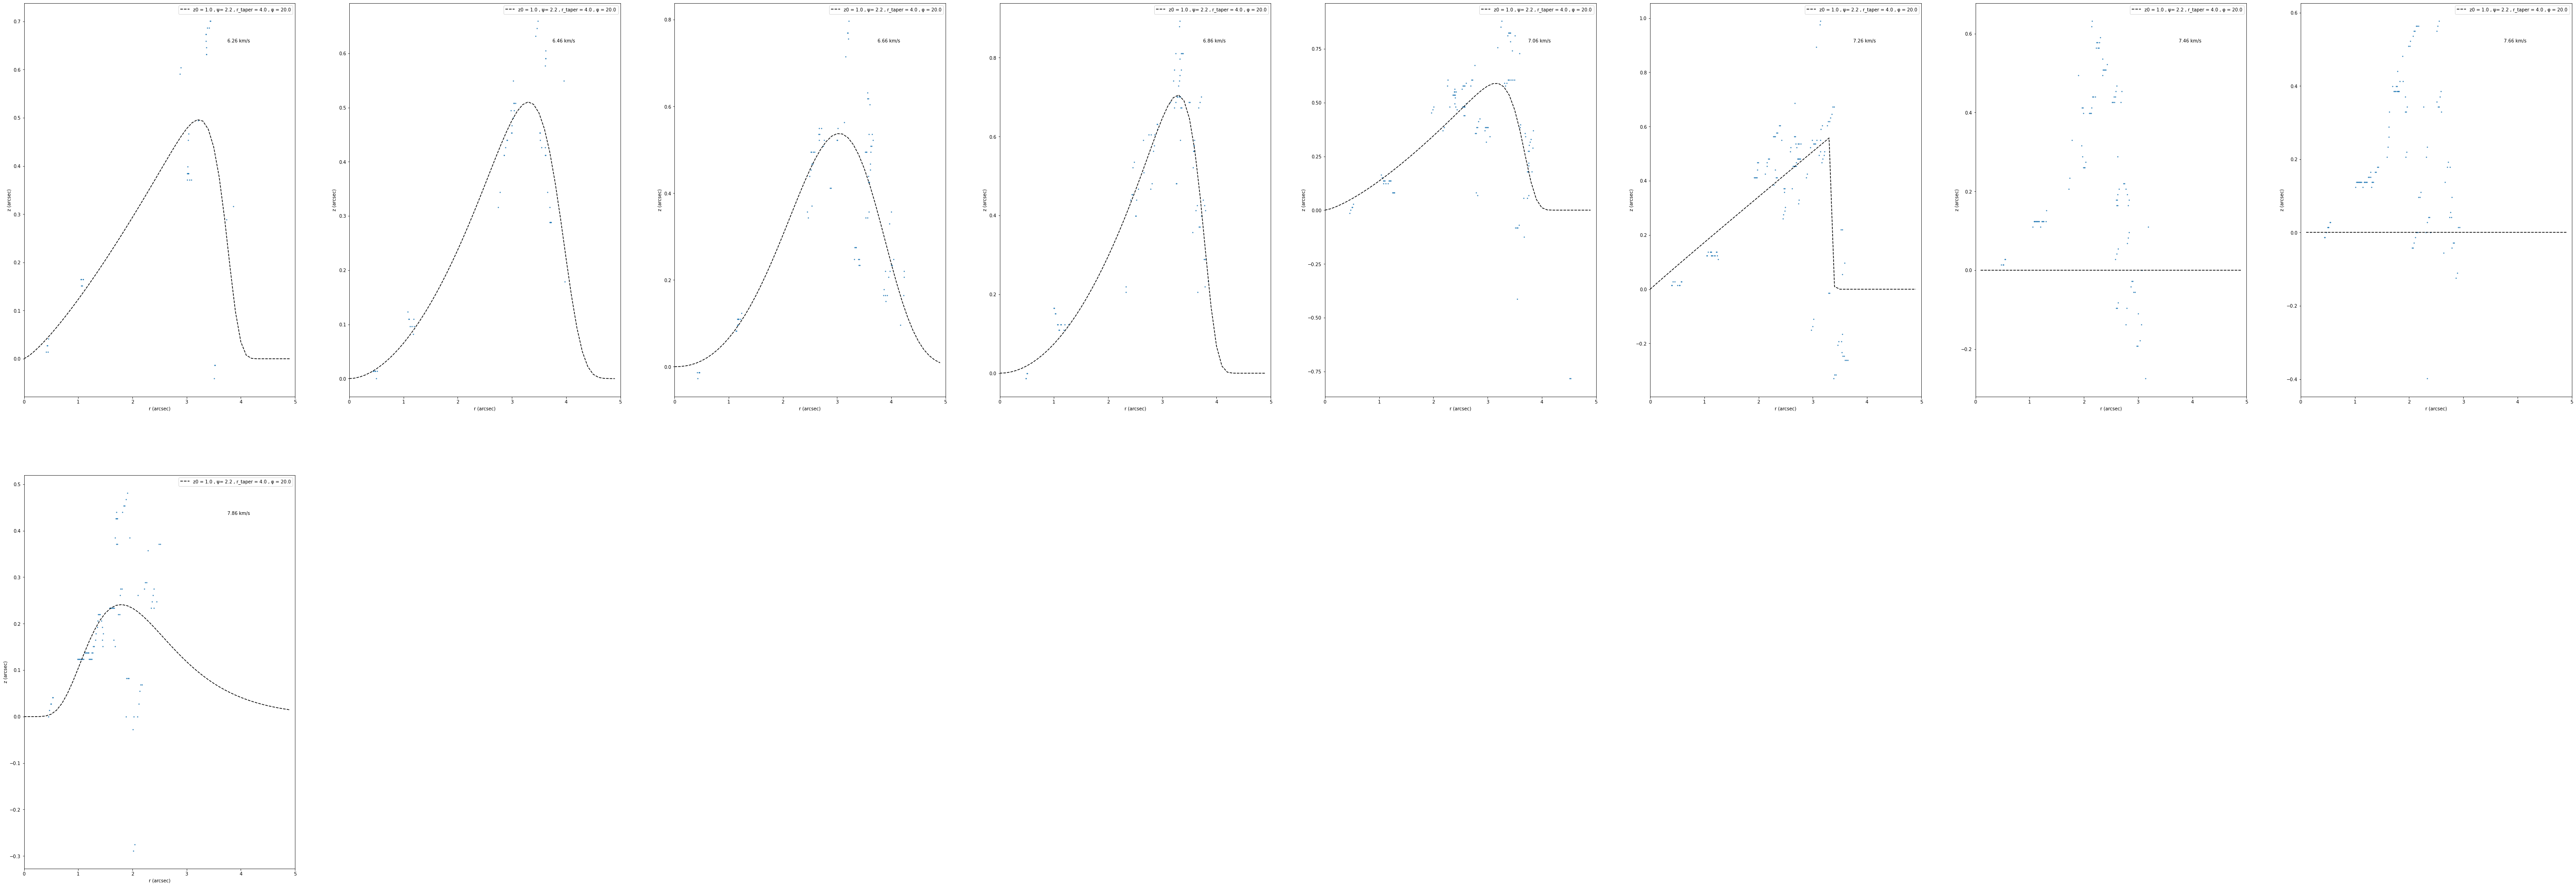

In [26]:
color_array = ['black', 'grey', 'red', 'peru', 'tan', 'orange', 'olive', 'yellow', 'lawngreen', 'seagreen', 'lightgreen', 'cyan', 'dodgerblue', 'navy', 'violet', 'orchid']
r = np.arange(0, 5, step=0.1)
z0 = [1.0]
Psi = [2.2]
r_taper = [4.0]
Phi = [20.0]

path = '/data/shared/HD163296_MAPS/HD_163296_HCN_260GHz_hf1.robust_0.5.clean.JvMcorr.image.pbcor.fits'
best_fit_curve_and_datapoints(path, r, z0, Psi, r_taper, Phi, color_array)

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from diskprojection import disk_observation

def plotting_fractional_residual(path_in, r_in, z0_in, Psi_in, r_taper_in, Phi_in, color_array_in):
    """
    This function plots the residuals from the best-fit model.
    It takes in seven parameters.
    
    Args:
        path_in (str): name[no units] of directory holding the real ALMA observational images.
        zo_in (float/list): input scale height [in arcsec].
        r_in (float/list): input list of the radii[in arcsec] we are observing.
        Psi_in (float/list): a unitless parameter.
        r_taper_in (float/list): input "tapered" radius [in arcsec].
        Phi_in (float/list): another unitless parameter.
        color_array_in (list): input list of colors.
        
    Returns:
        This function returns nothing.
    """
    HD163296_molecule = disk_observation(path_in)
    r, z, Fnu, velocity, x, yf, yn = HD163296_molecule.get_emission_surface_v2(inc=46.7, PA=313.3, chans = [28, 98], r_max = 5, min_Fnu = 0.0025)
    fig = plt.figure(figsize=(100, 130))
    for index, velo in enumerate(np.unique(velocity)):
        if round(velo / 1000., 2) >= 6.26 and round(velo / 1000., 2) <= 7.86:
            rvals_tofit = r[np.where(velocity==velo)]
            zvals_tofit = z[np.where(velocity==velo)]
            i = 0
            ax = plt.subplot(7, 8, index+1)
            ax.set_xlabel('r (arcsec)')
            ax.set_ylabel('fractional residual (arcsec)')
            ax.set_xlim(left = 0, right=5)
            ax.text(0.75, 0.9, "%.2f km/s" % (velo/1000.), transform=ax.transAxes)
            for count, value in enumerate(product(z0_in, Psi_in, r_taper_in, Phi_in)):
                popt, cov = HD163296_molecule.fit_emission_surface(rvals_tofit, zvals_tofit, curve_fit_kwargs = {'p0': np.array([value[0], value[1], value[2], value[3]])})
                ax.scatter(rvals_tofit, fractional_residual(zvals_tofit, tapered_power_law(rvals_tofit, popt[0], popt[1], popt[2], popt[3])), s=2)
                i = i + 1
    plt.show()

Using -1.34 km/s to 12.66 km/s, and 0.00" to 5.00".
Rotating data cube...
Detecting peaks...


<ipython-input-1-67fb193d4926>:15: RuntimeWarning: divide by zero encountered in true_divide
  residual = (z_measured - z_model) / z_model
/usr/local/anaconda/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
<ipython-input-1-67fb193d4926>:15: RuntimeWarning: invalid value encountered in true_divide
  residual = (z_measured - z_model) / z_model
/data/shared/diskprojection/diskprojection/diskprojection.py:1415: RuntimeWarning: invalid value encountered in power
  return f * np.exp(-(rr / r_taper)**q_taper)


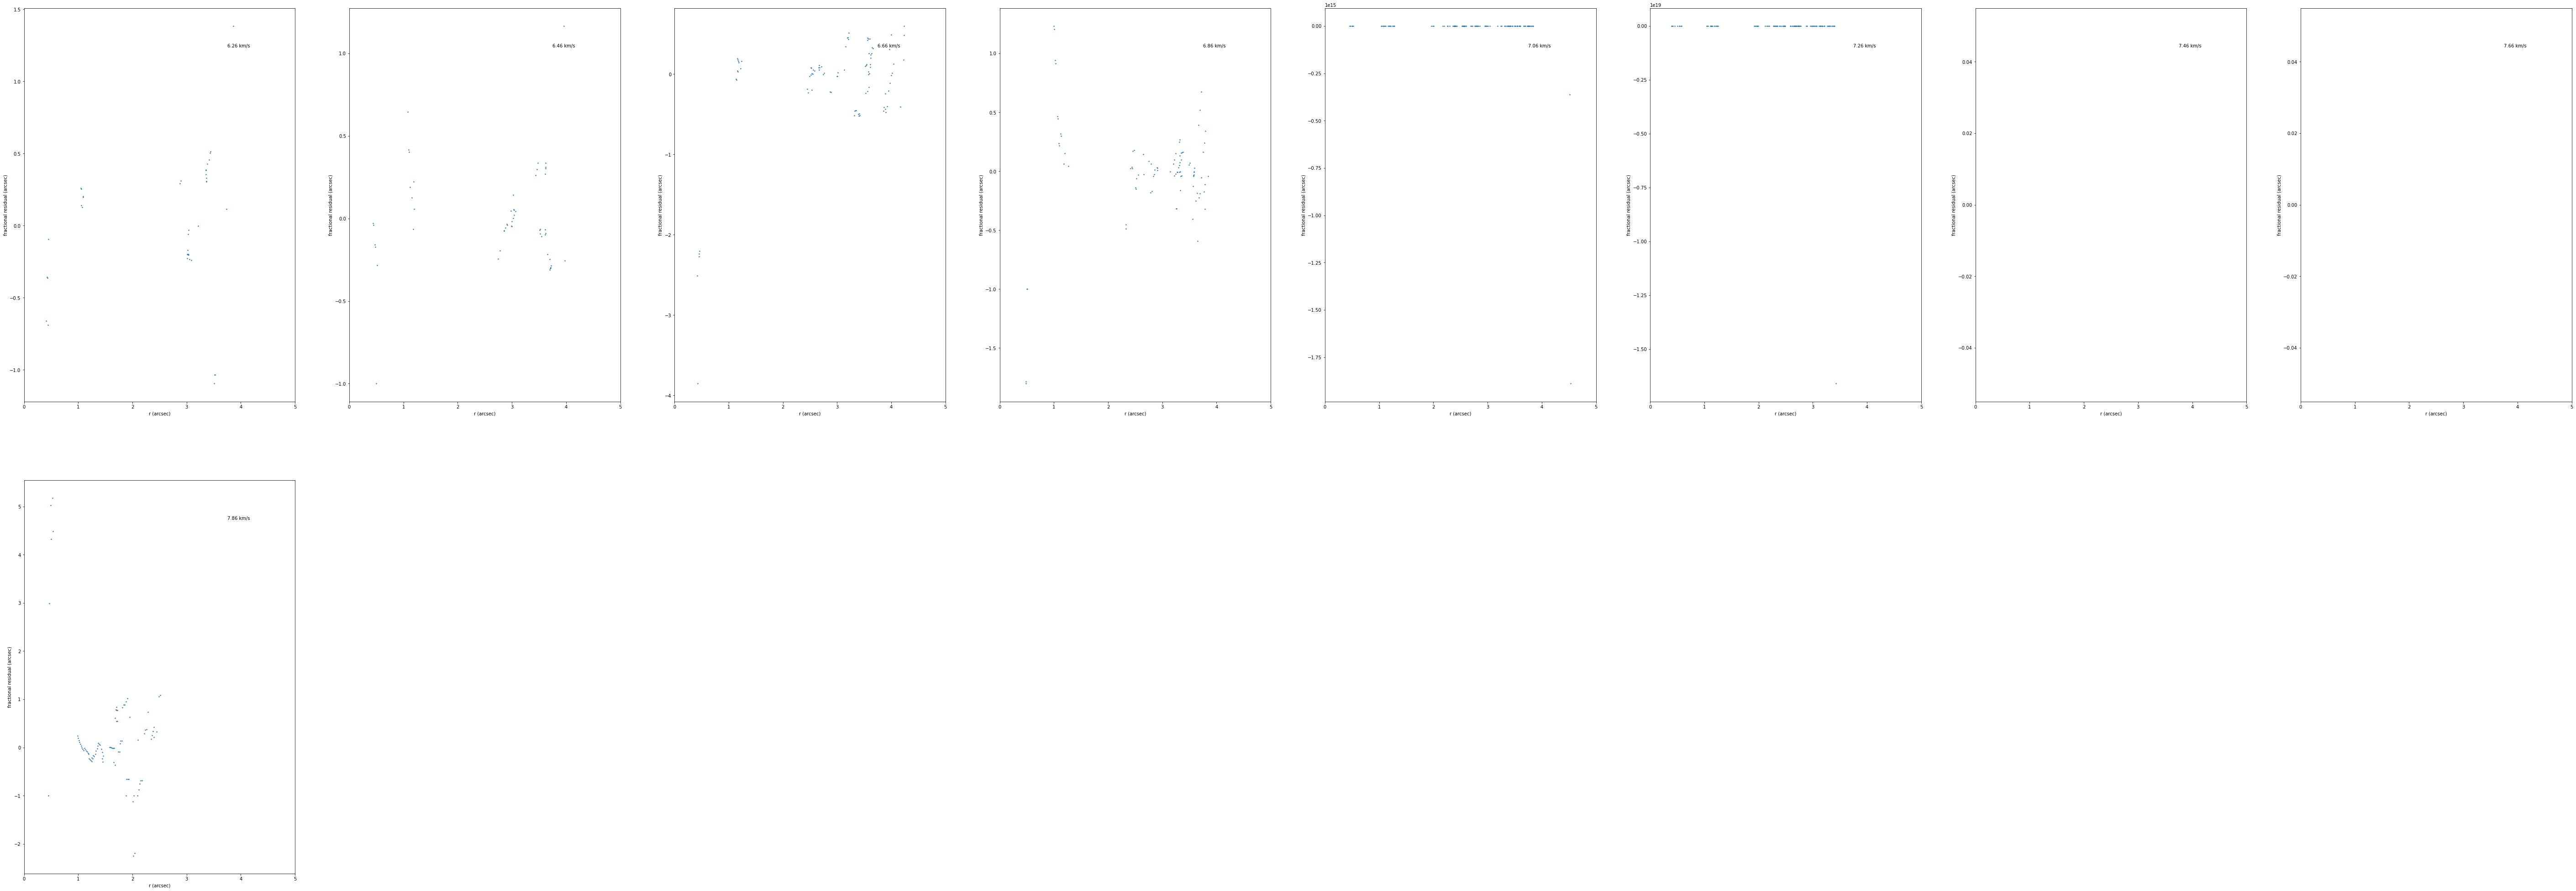

In [27]:
plotting_fractional_residual(path, r, z0, Psi, r_taper, Phi, color_array)

In [13]:
print('The fractional residuals are better in channel "6.46 km/s", "6.66 km/s", and "6.86 km/s" because there are no generic patterns in these channels and the deviation between the observed values and the real data points are generally smaller than other channels.')

The fractional residuals are better in channel "6.46 km/s", "6.66 km/s", and "6.86 km/s" because there are no generic patterns in these channels and the deviation between the observed values and the real data points are generally smaller than other channels.


In [14]:
print('Generally speaking, the lager the radii, the bigger the deviation between the observed values and the model predictions.')

Generally speaking, the lager the radii, the bigger the deviation between the observed values and the model predictions.


Using -1.34 km/s to 12.66 km/s, and 0.00" to 5.00".
Rotating data cube...
Detecting peaks...


/data/shared/diskprojection/diskprojection/diskprojection.py:1415: RuntimeWarning: overflow encountered in power
  return f * np.exp(-(rr / r_taper)**q_taper)
<ipython-input-2-437d04988e8f>:19: RuntimeWarning: overflow encountered in power
  height_z = ((r_in) ** Psi_in) * z0_in * np.exp(np.sign((-(r_in / r_taper_in))) * (np.abs((-(r_in / r_taper_in)))) ** Phi_in)
/usr/local/anaconda/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
<ipython-input-2-437d04988e8f>:19: RuntimeWarning: divide by zero encountered in power
  height_z = ((r_in) ** Psi_in) * z0_in * np.exp(np.sign((-(r_in / r_taper_in))) * (np.abs((-(r_in / r_taper_in)))) ** Phi_in)
<ipython-input-2-437d04988e8f>:19: RuntimeWarning: overflow encountered in power
  height_z = ((r_in) ** Psi_in) * z0_in * np.exp(np.sign((-(r_in / r_taper_in))) * (np.abs((-(r_in / r_taper_in)))) ** 

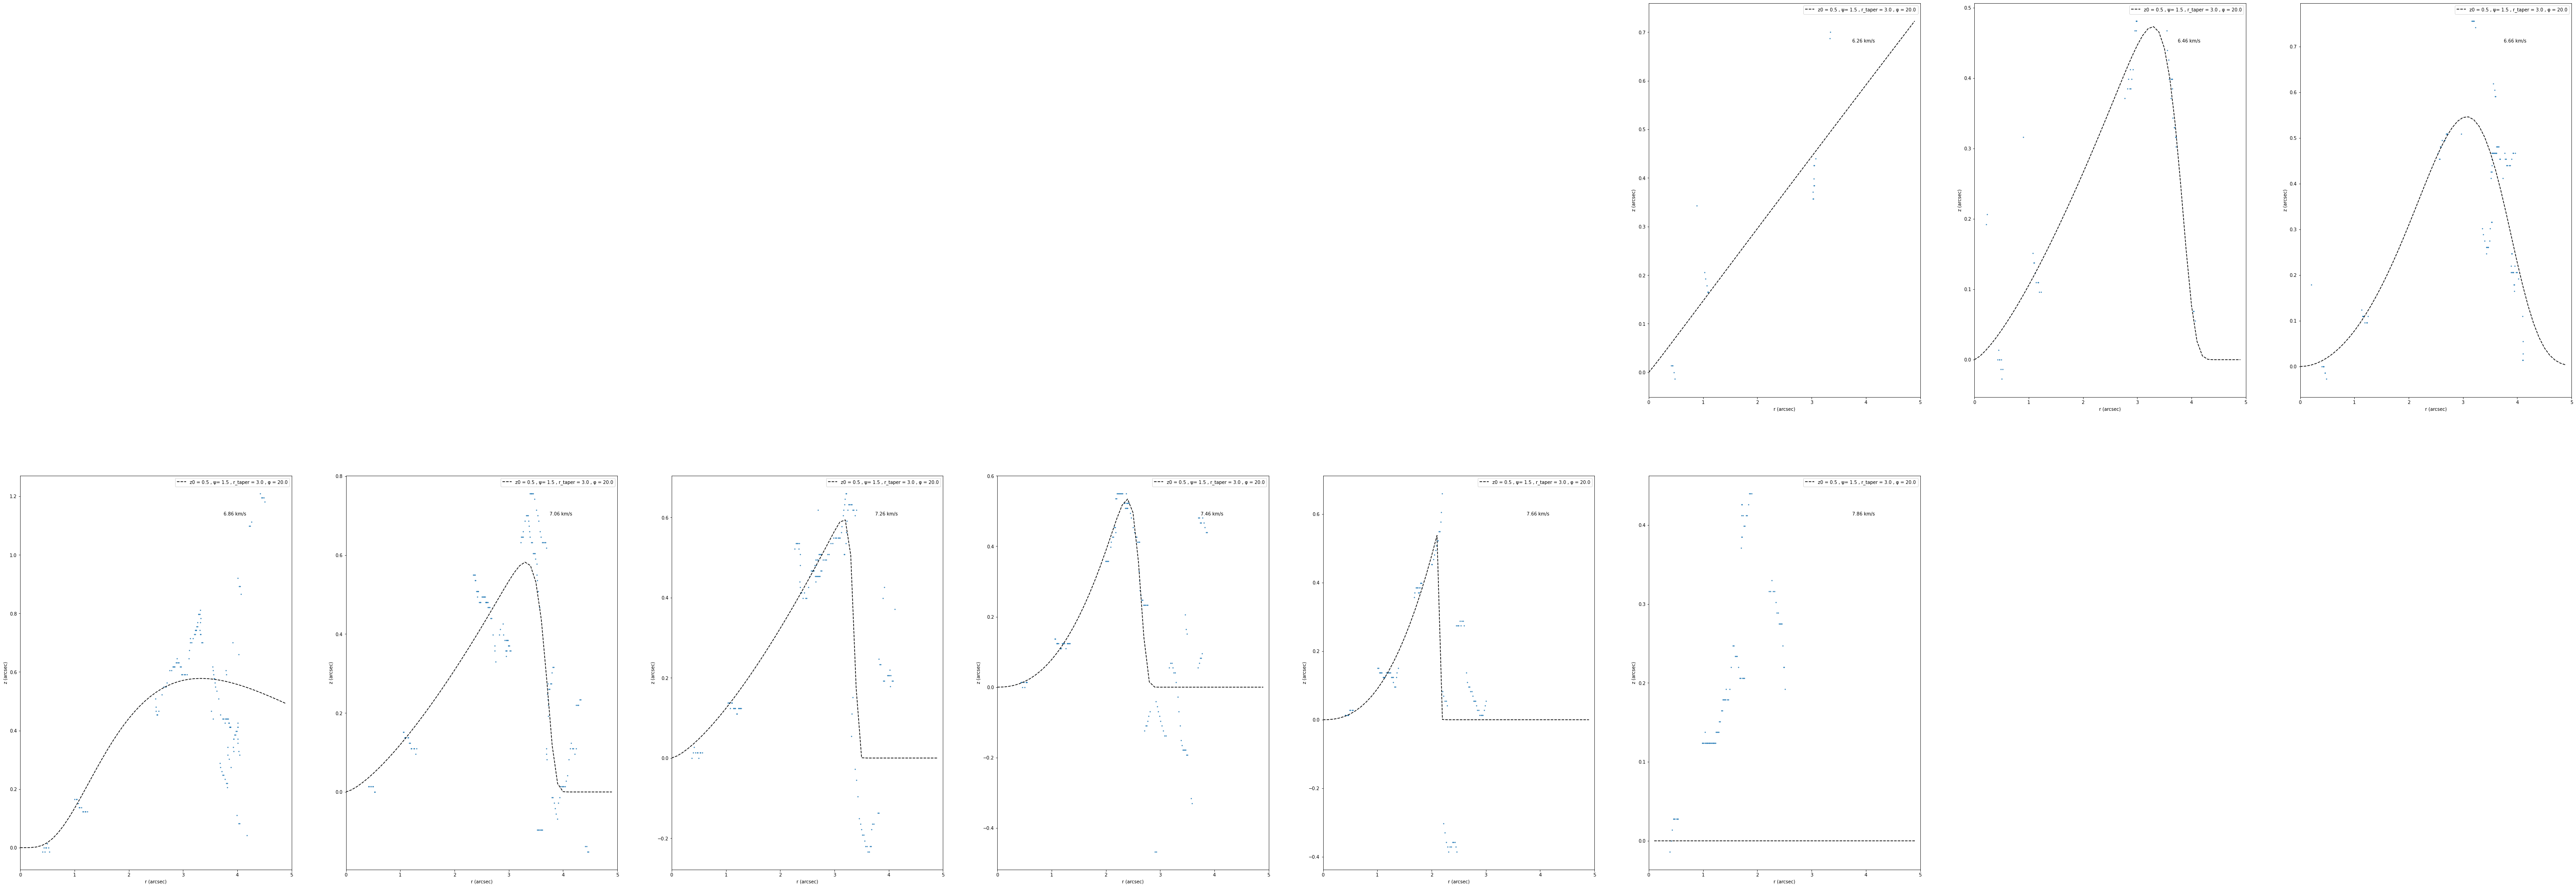

In [15]:
color_array = ['black', 'grey', 'red', 'peru', 'tan', 'orange', 'olive', 'yellow', 'lawngreen', 'seagreen', 'lightgreen', 'cyan', 'dodgerblue', 'navy', 'violet', 'orchid']
r_2 = np.arange(0, 5, step=0.1)
z0_2 = [0.5]
Psi_2 = [1.5]
r_taper_2 = [3.0]
Phi_2 = [20.0]

path_2 = '/data/shared/HD163296_MAPS/HD_163296_HCN_260GHz_hf1.0.2arcsec.clean.JvMcorr.image.pbcor.fits'
best_fit_curve_and_datapoints(path_2, r_2, z0_2, Psi_2, r_taper_2, Phi_2, color_array)

Using -1.34 km/s to 12.66 km/s, and 0.00" to 5.00".
Rotating data cube...
Detecting peaks...


<ipython-input-1-67fb193d4926>:15: RuntimeWarning: divide by zero encountered in true_divide
  residual = (z_measured - z_model) / z_model
<ipython-input-1-67fb193d4926>:15: RuntimeWarning: overflow encountered in true_divide
  residual = (z_measured - z_model) / z_model
/data/shared/diskprojection/diskprojection/diskprojection.py:1415: RuntimeWarning: overflow encountered in power
  return f * np.exp(-(rr / r_taper)**q_taper)
<ipython-input-2-437d04988e8f>:19: RuntimeWarning: overflow encountered in power
  height_z = ((r_in) ** Psi_in) * z0_in * np.exp(np.sign((-(r_in / r_taper_in))) * (np.abs((-(r_in / r_taper_in)))) ** Phi_in)
/usr/local/anaconda/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
<ipython-input-1-67fb193d4926>:15: RuntimeWarning: invalid value encountered in true_divide
  residual = (z_measured - z_model) / z_model


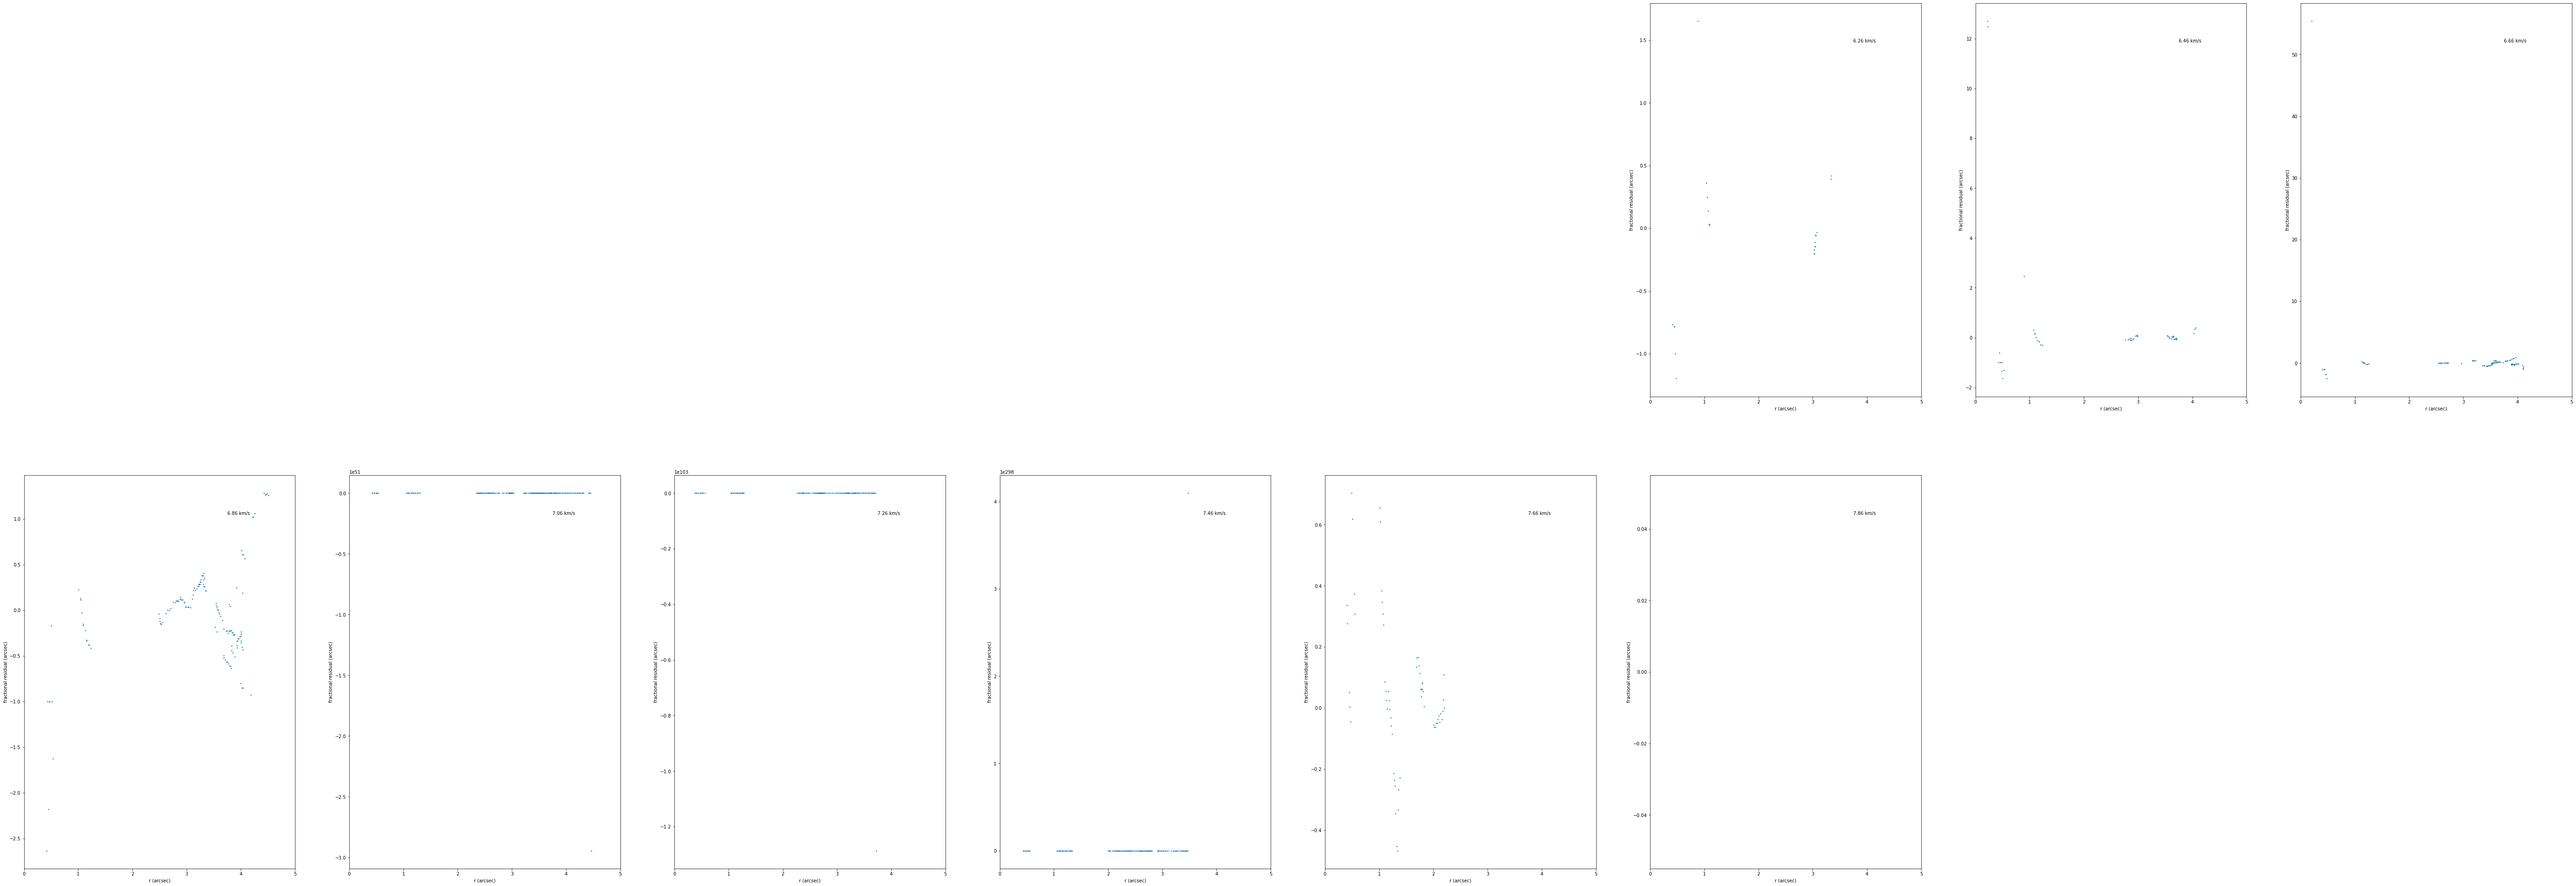

In [16]:
plotting_fractional_residual(path_2, r_2, z0_2, Psi_2, r_taper_2, Phi_2, color_array)

In [17]:
print('The fractional residuals are better in channel "6.26 km/s", "6.46 km/s", "6.86 km/s", and "7.66 km/s".')

The fractional residuals are better in channel "6.26 km/s", "6.46 km/s", "6.86 km/s", and "7.66 km/s".


In [18]:
print('As to how residual changes with the radii, the deviations at larger radii are generally smaller compared to that at smaller radii.')

As to how residual changes with the radii, the deviations at larger radii are generally smaller compared to that at smaller radii.


In [19]:
import numpy as np
import matplotlib.pyplot as plt
from diskprojection import disk_observation

def best_fit_curve_and_restricted_datapoints(path_in, r_in, z0_in, Psi_in, r_taper_in, Phi_in, r_restricted_in, c_in, color_array_in):
    """
    This function plots best fit curves over restricted datapoints in a given channel.
    It takes in nine parameters.
    
    Args:
        path_in (str): name[no units] of directory holding the real ALMA observational images.
        zo_in (float/list): input scale height [in arcsec].
        r_in (float/list): input list of the radii[in arcsec] we are observing.
        Psi_in (float/list): a unitless parameter.
        r_taper_in (float/list): input "tapered" radius [in arcsec].
        Phi_in (float/list): another unitless parameter.
        color_array_in (list): input list of colors.
        r_restricted_in (float): input restricted radius [in arcsec].
        c_in (float): input channel [in km/s].
        
    Returns:
        This function returns nothing.
    """
    HD163296_molecule = disk_observation(path_in)
    r, z, Fnu, velocity, x, yf, yn = HD163296_molecule.get_emission_surface_v2(inc=46.7, PA=313.3, chans = [28, 98], r_max = 5, min_Fnu = 0.0025)
    fig = plt.figure(figsize=(80, 80))
    i = np.array([])
    for index, velo in enumerate(np.unique(velocity)):
        if round(velo / 1000., 2) == c_in:
            rvals_tofit = r[np.where(r[np.where(velocity==velo)]<r_restricted_in)]
            zvals_tofit = z[np.where(r[np.where(velocity==velo)]<r_restricted_in)]
            i = 0
            ax = plt.subplot(7, 8, index+1)
            ax.scatter(rvals_tofit, zvals_tofit,s=2)
            ax.set_xlabel('r (arcsec)')
            ax.set_ylabel('z (arcsec)')
            ax.set_xlim(left = 0, right=4)
            ax.text(0.75, 0.9, "%.2f km/s" % (velo/1000.), transform=ax.transAxes)
            for count, value in enumerate(product(z0_in, Psi_in, r_taper_in, Phi_in)):
                popt, cov = HD163296_molecule.fit_emission_surface(rvals_tofit, zvals_tofit, curve_fit_kwargs = {'p0': np.array([value[0], value[1], value[2], value[3]])})
                ax.plot(r_in, tapered_power_law(r_in, popt[0], popt[1], popt[2], popt[3]), 'r--', color=color_array_in[i], label='z0 = ' + str(value[0]) + ' , ψ= ' + str(value[1]) + ' , r_taper = ' + str(value[2]) + ' , φ = ' + str(value[3]))
                i = i + 1
                ax.legend()
    plt.show()

Using -1.34 km/s to 12.66 km/s, and 0.00" to 5.00".
Rotating data cube...
Detecting peaks...


<ipython-input-2-437d04988e8f>:19: RuntimeWarning: divide by zero encountered in power
  height_z = ((r_in) ** Psi_in) * z0_in * np.exp(np.sign((-(r_in / r_taper_in))) * (np.abs((-(r_in / r_taper_in)))) ** Phi_in)


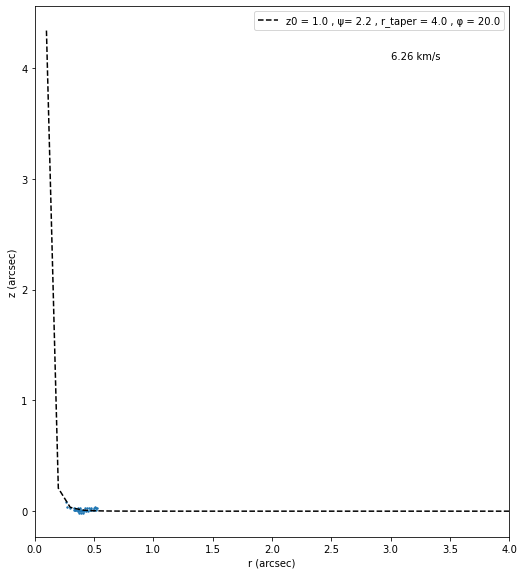

Using -1.34 km/s to 12.66 km/s, and 0.00" to 5.00".
Rotating data cube...
Detecting peaks...


/data/shared/diskprojection/diskprojection/diskprojection.py:1415: RuntimeWarning: overflow encountered in power
  return f * np.exp(-(rr / r_taper)**q_taper)
/usr/local/anaconda/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
<ipython-input-2-437d04988e8f>:19: RuntimeWarning: divide by zero encountered in power
  height_z = ((r_in) ** Psi_in) * z0_in * np.exp(np.sign((-(r_in / r_taper_in))) * (np.abs((-(r_in / r_taper_in)))) ** Phi_in)
<ipython-input-2-437d04988e8f>:19: RuntimeWarning: overflow encountered in power
  height_z = ((r_in) ** Psi_in) * z0_in * np.exp(np.sign((-(r_in / r_taper_in))) * (np.abs((-(r_in / r_taper_in)))) ** Phi_in)
<ipython-input-2-437d04988e8f>:19: RuntimeWarning: invalid value encountered in multiply
  height_z = ((r_in) ** Psi_in) * z0_in * np.exp(np.sign((-(r_in / r_taper_in))) * (np.abs((-(r_in / r_taper_in

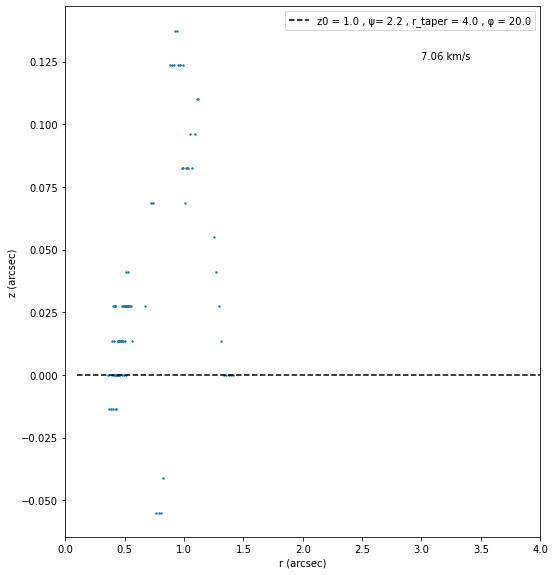

Using -1.34 km/s to 12.66 km/s, and 0.00" to 5.00".
Rotating data cube...
Detecting peaks...


/data/shared/diskprojection/diskprojection/diskprojection.py:1415: RuntimeWarning: invalid value encountered in power
  return f * np.exp(-(rr / r_taper)**q_taper)


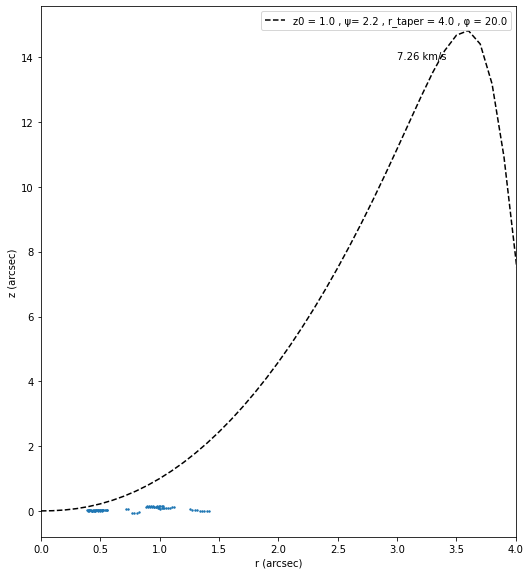

Using -1.34 km/s to 12.66 km/s, and 0.00" to 5.00".
Rotating data cube...
Detecting peaks...


/usr/local/anaconda/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


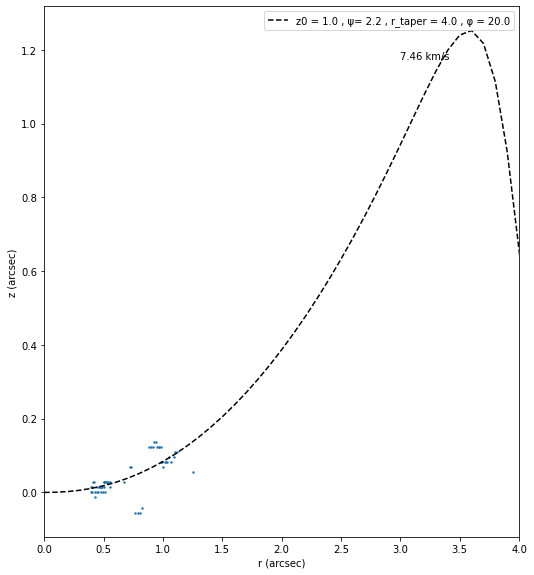

Using -1.34 km/s to 12.66 km/s, and 0.00" to 5.00".
Rotating data cube...
Detecting peaks...


/data/shared/diskprojection/diskprojection/diskprojection.py:1415: RuntimeWarning: overflow encountered in power
  return f * np.exp(-(rr / r_taper)**q_taper)
/usr/local/anaconda/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
<ipython-input-2-437d04988e8f>:19: RuntimeWarning: divide by zero encountered in power
  height_z = ((r_in) ** Psi_in) * z0_in * np.exp(np.sign((-(r_in / r_taper_in))) * (np.abs((-(r_in / r_taper_in)))) ** Phi_in)
<ipython-input-2-437d04988e8f>:19: RuntimeWarning: overflow encountered in power
  height_z = ((r_in) ** Psi_in) * z0_in * np.exp(np.sign((-(r_in / r_taper_in))) * (np.abs((-(r_in / r_taper_in)))) ** Phi_in)
<ipython-input-2-437d04988e8f>:19: RuntimeWarning: invalid value encountered in multiply
  height_z = ((r_in) ** Psi_in) * z0_in * np.exp(np.sign((-(r_in / r_taper_in))) * (np.abs((-(r_in / r_taper_in

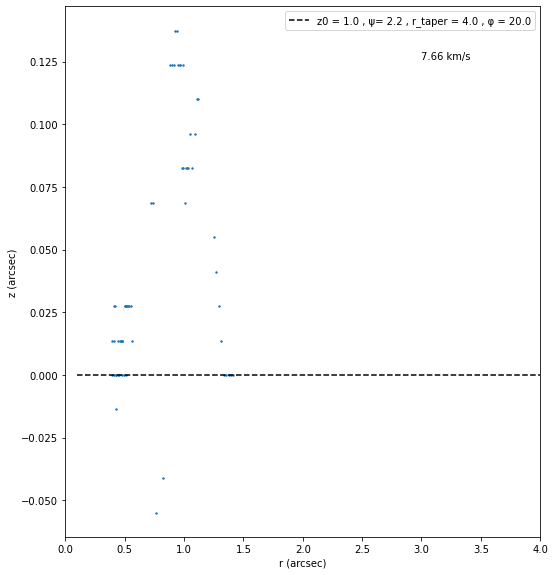

Using -1.34 km/s to 12.66 km/s, and 0.00" to 5.00".
Rotating data cube...
Detecting peaks...


/usr/local/anaconda/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


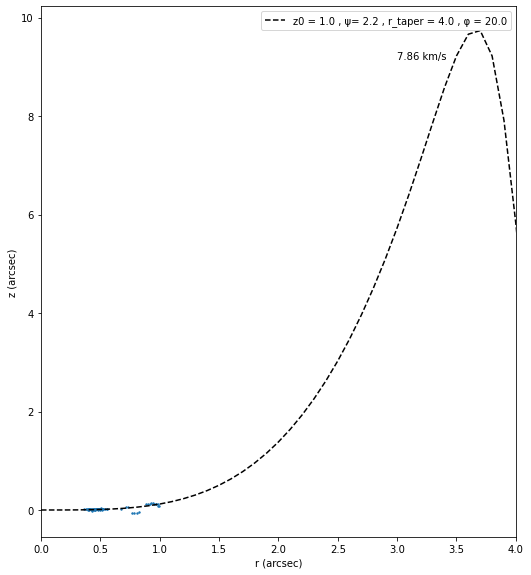

In [20]:
color_array = ['black', 'grey', 'red', 'peru', 'tan', 'orange', 'olive', 'yellow', 'lawngreen', 'seagreen', 'lightgreen', 'cyan', 'dodgerblue', 'navy', 'violet', 'orchid']
r = np.arange(0, 5, step=0.1)
z0 = [1.0]
Psi = [2.2]
r_taper = [4.0]
Phi = [20.0]
c = [6.26, 7.06, 7.26, 7.46, 7.66, 7.86]
r_restricted = [3.5, 3.5, 3.0, 2.5, 2.0, 2.0]

path = '/data/shared/HD163296_MAPS/HD_163296_HCN_260GHz_hf1.robust_0.5.clean.JvMcorr.image.pbcor.fits'
for count, value in enumerate(c):
    best_fit_curve_and_restricted_datapoints(path, r, z0, Psi, r_taper, Phi, r_restricted[count], c[count], color_array)

Using -1.34 km/s to 12.66 km/s, and 0.00" to 5.00".
Rotating data cube...
Detecting peaks...


/data/shared/diskprojection/diskprojection/diskprojection.py:1415: RuntimeWarning: overflow encountered in power
  return f * np.exp(-(rr / r_taper)**q_taper)
<ipython-input-25-437d04988e8f>:19: RuntimeWarning: divide by zero encountered in power
  height_z = ((r_in) ** Psi_in) * z0_in * np.exp(np.sign((-(r_in / r_taper_in))) * (np.abs((-(r_in / r_taper_in)))) ** Phi_in)
<ipython-input-25-437d04988e8f>:19: RuntimeWarning: overflow encountered in power
  height_z = ((r_in) ** Psi_in) * z0_in * np.exp(np.sign((-(r_in / r_taper_in))) * (np.abs((-(r_in / r_taper_in)))) ** Phi_in)
<ipython-input-25-437d04988e8f>:19: RuntimeWarning: invalid value encountered in multiply
  height_z = ((r_in) ** Psi_in) * z0_in * np.exp(np.sign((-(r_in / r_taper_in))) * (np.abs((-(r_in / r_taper_in)))) ** Phi_in)


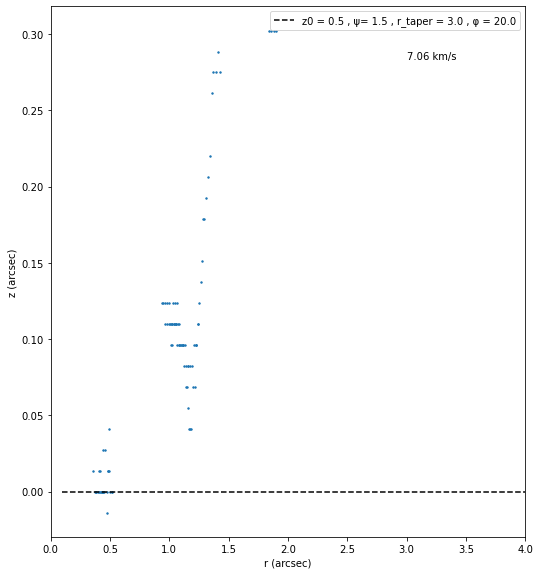

Using -1.34 km/s to 12.66 km/s, and 0.00" to 5.00".
Rotating data cube...
Detecting peaks...


/data/shared/diskprojection/diskprojection/diskprojection.py:1415: RuntimeWarning: overflow encountered in power
  return f * np.exp(-(rr / r_taper)**q_taper)
/usr/local/anaconda/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
<ipython-input-25-437d04988e8f>:19: RuntimeWarning: divide by zero encountered in power
  height_z = ((r_in) ** Psi_in) * z0_in * np.exp(np.sign((-(r_in / r_taper_in))) * (np.abs((-(r_in / r_taper_in)))) ** Phi_in)
<ipython-input-25-437d04988e8f>:19: RuntimeWarning: overflow encountered in power
  height_z = ((r_in) ** Psi_in) * z0_in * np.exp(np.sign((-(r_in / r_taper_in))) * (np.abs((-(r_in / r_taper_in)))) ** Phi_in)
<ipython-input-25-437d04988e8f>:19: RuntimeWarning: invalid value encountered in multiply
  height_z = ((r_in) ** Psi_in) * z0_in * np.exp(np.sign((-(r_in / r_taper_in))) * (np.abs((-(r_in / r_taper

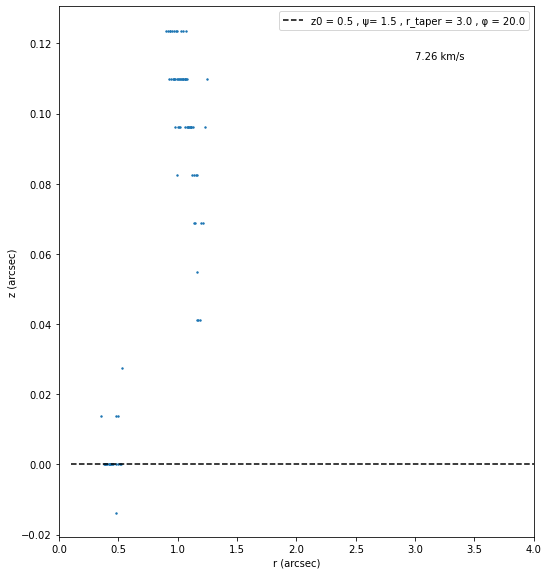

Using -1.34 km/s to 12.66 km/s, and 0.00" to 5.00".
Rotating data cube...
Detecting peaks...


/data/shared/diskprojection/diskprojection/diskprojection.py:1415: RuntimeWarning: overflow encountered in power
  return f * np.exp(-(rr / r_taper)**q_taper)
/usr/local/anaconda/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
<ipython-input-25-437d04988e8f>:19: RuntimeWarning: divide by zero encountered in power
  height_z = ((r_in) ** Psi_in) * z0_in * np.exp(np.sign((-(r_in / r_taper_in))) * (np.abs((-(r_in / r_taper_in)))) ** Phi_in)
<ipython-input-25-437d04988e8f>:19: RuntimeWarning: overflow encountered in power
  height_z = ((r_in) ** Psi_in) * z0_in * np.exp(np.sign((-(r_in / r_taper_in))) * (np.abs((-(r_in / r_taper_in)))) ** Phi_in)
<ipython-input-25-437d04988e8f>:19: RuntimeWarning: invalid value encountered in multiply
  height_z = ((r_in) ** Psi_in) * z0_in * np.exp(np.sign((-(r_in / r_taper_in))) * (np.abs((-(r_in / r_taper

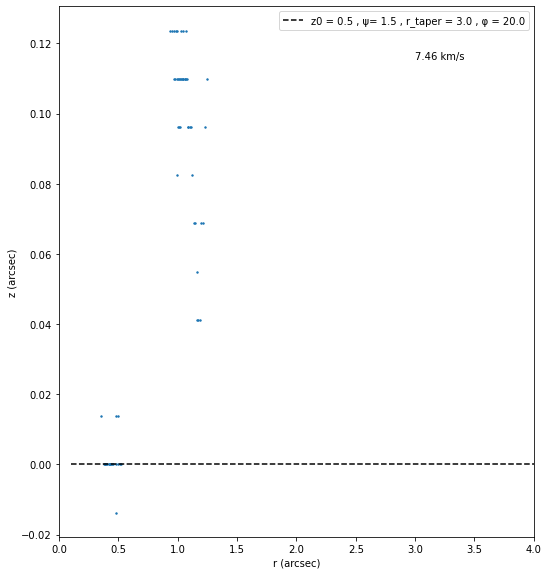

Using -1.34 km/s to 12.66 km/s, and 0.00" to 5.00".
Rotating data cube...
Detecting peaks...


/data/shared/diskprojection/diskprojection/diskprojection.py:1415: RuntimeWarning: overflow encountered in power
  return f * np.exp(-(rr / r_taper)**q_taper)
/usr/local/anaconda/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
<ipython-input-25-437d04988e8f>:19: RuntimeWarning: divide by zero encountered in power
  height_z = ((r_in) ** Psi_in) * z0_in * np.exp(np.sign((-(r_in / r_taper_in))) * (np.abs((-(r_in / r_taper_in)))) ** Phi_in)
<ipython-input-25-437d04988e8f>:19: RuntimeWarning: overflow encountered in power
  height_z = ((r_in) ** Psi_in) * z0_in * np.exp(np.sign((-(r_in / r_taper_in))) * (np.abs((-(r_in / r_taper_in)))) ** Phi_in)
<ipython-input-25-437d04988e8f>:19: RuntimeWarning: invalid value encountered in multiply
  height_z = ((r_in) ** Psi_in) * z0_in * np.exp(np.sign((-(r_in / r_taper_in))) * (np.abs((-(r_in / r_taper

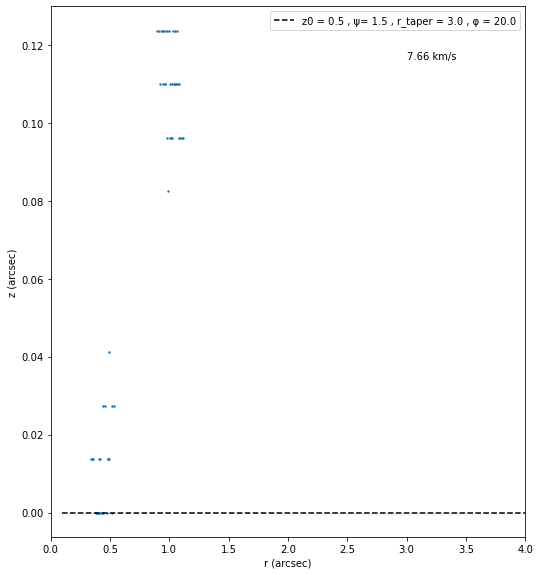

In [28]:
color_array = ['black', 'grey', 'red', 'peru', 'tan', 'orange', 'olive', 'yellow', 'lawngreen', 'seagreen', 'lightgreen', 'cyan', 'dodgerblue', 'navy', 'violet', 'orchid']
r_2 = np.arange(0, 5, step=0.1)
z0_2 = [0.5]
Psi_2 = [1.5]
r_taper_2 = [3.0]
Phi_2 = [20.0]
c_2 = [7.06, 7.26, 7.46, 7.66]
r_restricted_2 = [3.5, 3.1, 2.5, 2.1]

path_2 = '/data/shared/HD163296_MAPS/HD_163296_HCN_260GHz_hf1.0.2arcsec.clean.JvMcorr.image.pbcor.fits'
for count, value in enumerate(c_2):
    best_fit_curve_and_restricted_datapoints(path_2, r_2, z0_2, Psi_2, r_taper_2, Phi_2, r_restricted_2[count], c_2[count], color_array)

Using -1.34 km/s to 12.66 km/s, and 0.00" to 5.00".
Rotating data cube...
Detecting peaks...


/data/shared/diskprojection/diskprojection/diskprojection.py:1415: RuntimeWarning: invalid value encountered in power
  return f * np.exp(-(rr / r_taper)**q_taper)
/usr/local/anaconda/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/data/shared/diskprojection/diskprojection/diskprojection.py:1415: RuntimeWarning: invalid value encountered in power
  return f * np.exp(-(rr / r_taper)**q_taper)
/usr/local/anaconda/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/data/shared/diskprojection/diskprojection/diskprojection.py:1415: RuntimeWarning: invalid value encountered in power
  return f * np.exp(-(rr / r_taper)**q_taper)
/usr/local/anaconda/lib/python3.8/site-packages/scipy/optimize/minpack

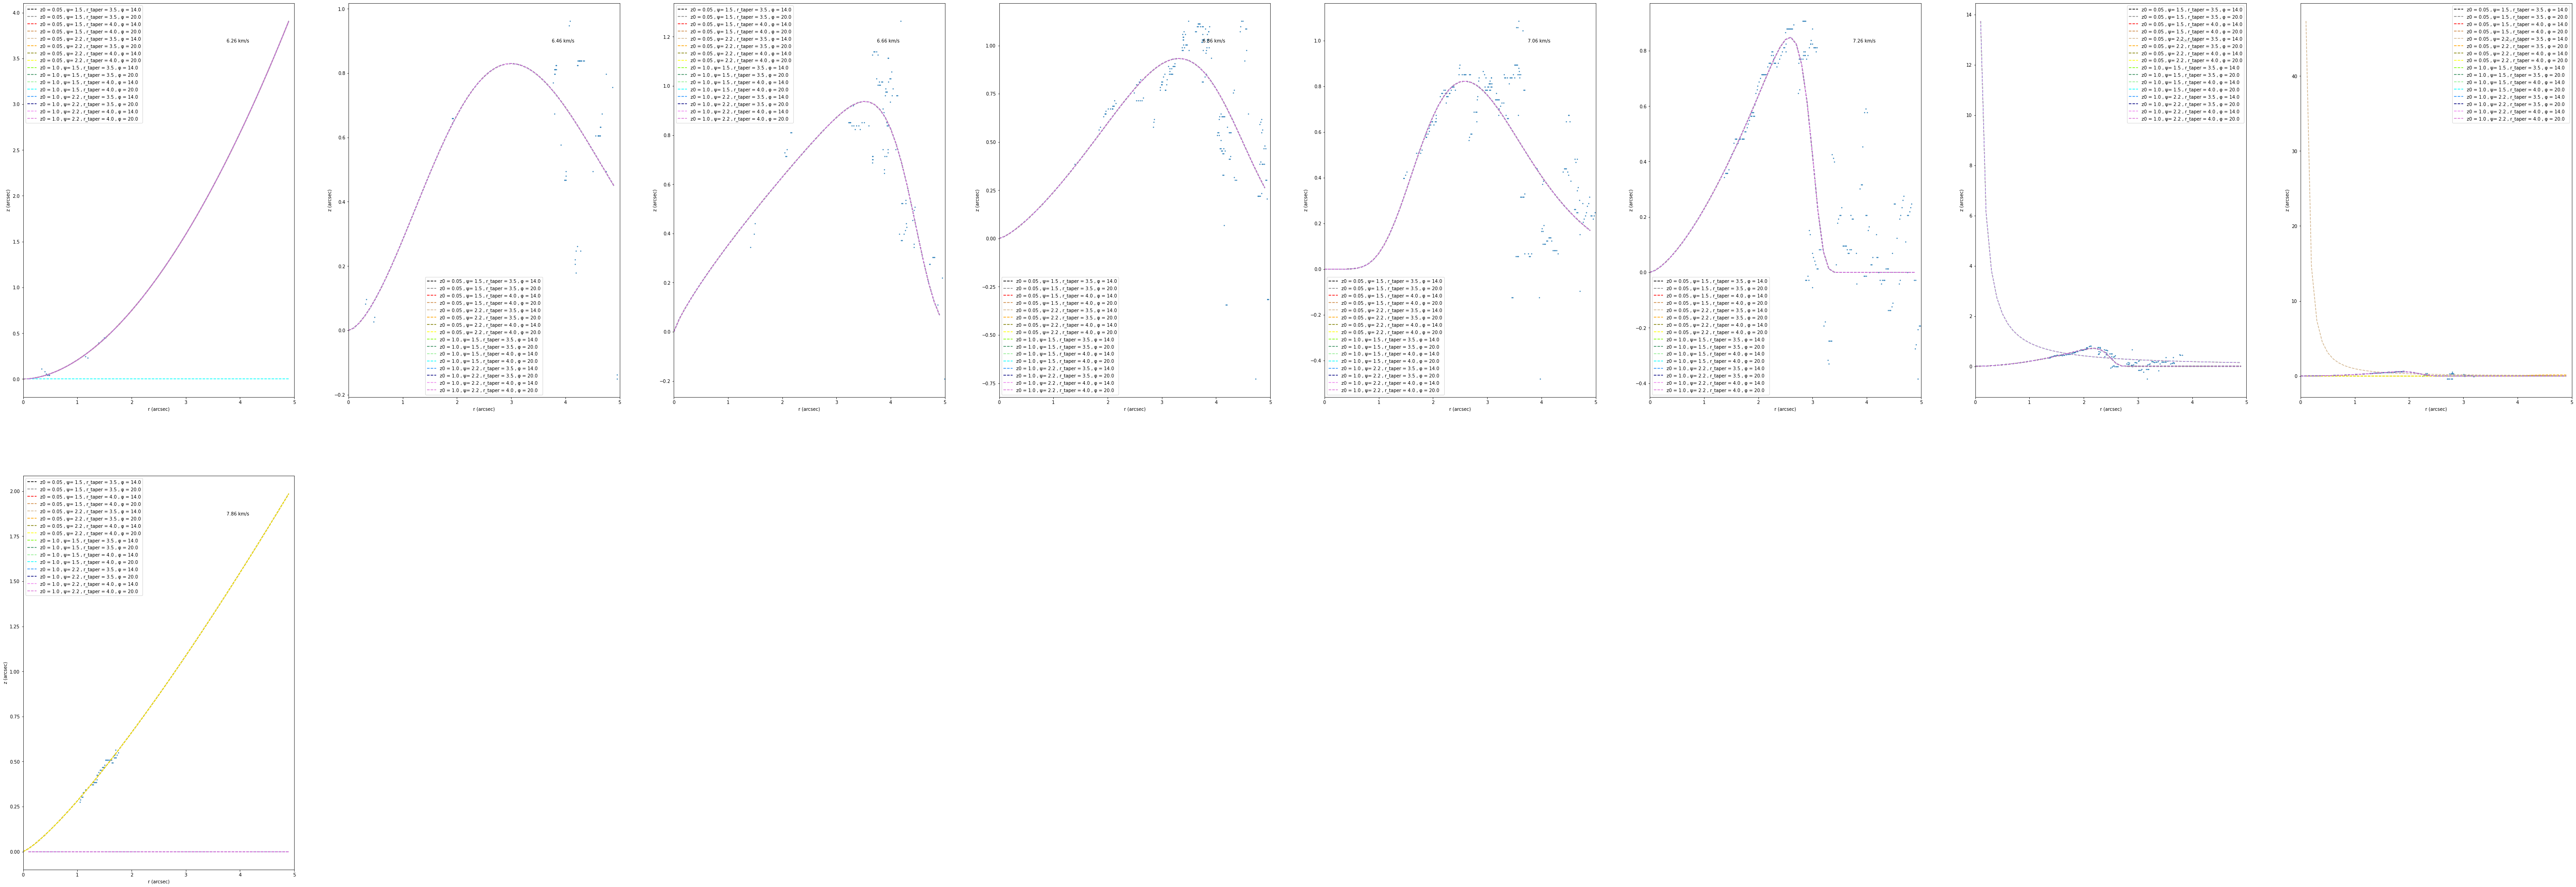

In [29]:
color_array = ['black', 'grey', 'red', 'peru', 'tan', 'orange', 'olive', 'yellow', 'lawngreen', 'seagreen', 'lightgreen', 'cyan', 'dodgerblue', 'navy', 'violet', 'orchid']
r = np.arange(0, 5, step=0.1)
z0_3 = [0.05, 1.0]
Psi_3 = [1.5, 2.2]
r_taper_3 = [3.5, 4.0]
Phi_3 = [14.0, 20.0]

path_3 = '/data/shared/HD163296_MAPS/HD_163296_CO_220GHz.robust_0.5.clean.JvMcorr.image.pbcor.fits'
path_4 = '/data/shared/HD163296_MAPS/HD_163296_CO_220GHz.0.2arcsec.clean.JvMcorr.image.pbcor.fits'
path_5 = '/data/shared/HD163296_MAPS/HD_163296_13CO_220GHz.robust_0.5.clean.JvMcorr.image.pbcor.fits'
path_6 = '/data/shared/HD163296_MAPS/HD_163296_13CO_220GHz.0.2arcsec.clean.JvMcorr.image.pbcor.fits'
path_7 = '/data/shared/HD163296_MAPS/HD_163296_C18O_220GHz.robust_0.5.clean.JvMcorr.image.pbcor.fits'
path_8 = '/data/shared/HD163296_MAPS/HD_163296_C18O_220GHz.0.2arcsec.clean.JvMcorr.image.pbcor.fits'

best_fit_curve_and_datapoints(path_3, r, z0_3, Psi_3, r_taper_3, Phi_3, color_array)

Using -1.34 km/s to 12.66 km/s, and 0.00" to 5.00".
Rotating data cube...
Detecting peaks...


/data/shared/diskprojection/diskprojection/diskprojection.py:1415: RuntimeWarning: invalid value encountered in power
  return f * np.exp(-(rr / r_taper)**q_taper)
/usr/local/anaconda/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/data/shared/diskprojection/diskprojection/diskprojection.py:1415: RuntimeWarning: overflow encountered in power
  return f * np.exp(-(rr / r_taper)**q_taper)
<ipython-input-25-437d04988e8f>:19: RuntimeWarning: overflow encountered in power
  height_z = ((r_in) ** Psi_in) * z0_in * np.exp(np.sign((-(r_in / r_taper_in))) * (np.abs((-(r_in / r_taper_in)))) ** Phi_in)
<ipython-input-1-67fb193d4926>:15: RuntimeWarning: divide by zero encountered in true_divide
  residual = (z_measured - z_model) / z_model
<ipython-input-1-67fb193d4926>:15: RuntimeWarning: invalid value encountered in true_divide
  residual = (z_me

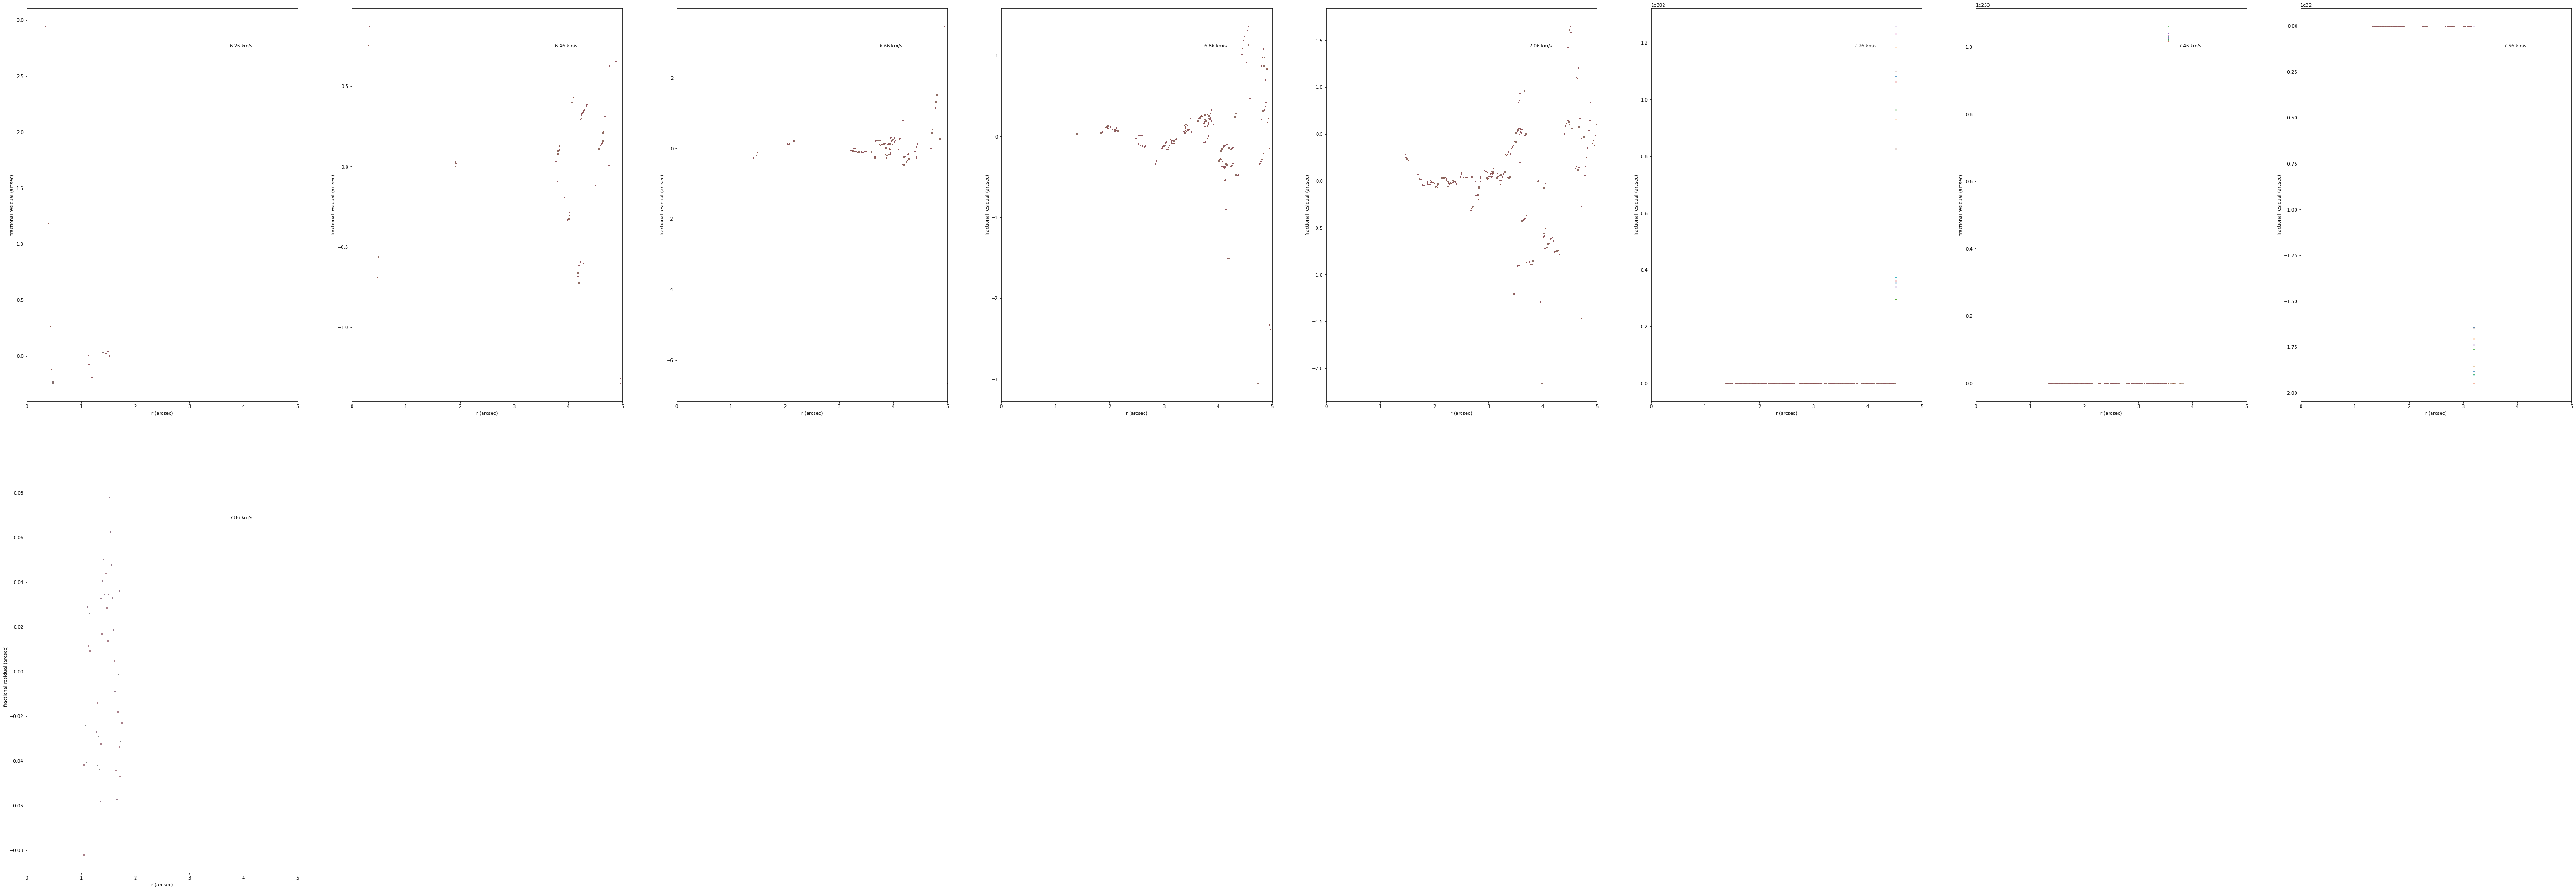

In [30]:
plotting_fractional_residual(path_3, r, z0_3, Psi_3, r_taper_3, Phi_3, color_array)

In [34]:
z0_4 = [0.05, 0.5]
Psi_4 = [1.5, 2.1]
r_taper_4 = [1.8, 3.0]
Phi_4 = [15.0, 20.0]

Using -1.34 km/s to 12.66 km/s, and 0.00" to 5.00".
Rotating data cube...
Detecting peaks...


/usr/local/anaconda/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/usr/local/anaconda/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/data/shared/diskprojection/diskprojection/diskprojection.py:1415: RuntimeWarning: overflow encountered in power
  return f * np.exp(-(rr / r_taper)**q_taper)
/usr/local/anaconda/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/data/shared/diskprojection/diskprojection/diskprojection.py:1415: RuntimeWarning: invalid value encountered in power
  return f * np.exp(-(rr / r_taper)**q_taper)
/usr/local/anaconda/

/data/shared/diskprojection/diskprojection/diskprojection.py:1415: RuntimeWarning: invalid value encountered in power
  return f * np.exp(-(rr / r_taper)**q_taper)
/data/shared/diskprojection/diskprojection/diskprojection.py:1415: RuntimeWarning: invalid value encountered in power
  return f * np.exp(-(rr / r_taper)**q_taper)


/data/shared/diskprojection/diskprojection/diskprojection.py:1415: RuntimeWarning: invalid value encountered in power
  return f * np.exp(-(rr / r_taper)**q_taper)
/data/shared/diskprojection/diskprojection/diskprojection.py:1415: RuntimeWarning: invalid value encountered in power
  return f * np.exp(-(rr / r_taper)**q_taper)


<ipython-input-25-437d04988e8f>:19: RuntimeWarning: divide by zero encountered in power
  height_z = ((r_in) ** Psi_in) * z0_in * np.exp(np.sign((-(r_in / r_taper_in))) * (np.abs((-(r_in / r_taper_in)))) ** Phi_in)
/data/shared/diskprojection/diskprojection/diskprojection.py:1415: RuntimeWarning: invalid value encountered in power
  return f * np.exp(-(rr / r_taper)**q_taper)


/data/shared/diskprojection/diskprojection/diskprojection.py:1415: RuntimeWarning: invalid value encountered in power
  return f * np.exp(-(rr / r_taper)**q_taper)
/data/shared/diskprojection/diskprojection/diskprojection.py:1415: RuntimeWarning: invalid value encountered in power
  return f * np.exp(-(rr / r_taper)**q_taper)
/usr/local/anaconda/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/data/shared/diskprojection/diskprojection/diskprojection.py:1415: RuntimeWarning: invalid value encountered in power
  return f * np.exp(-(rr / r_taper)**q_taper)
/usr/local/anaconda/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/data/shared/diskprojection/diskprojection/diskprojection.py:1415: Run

<ipython-input-25-437d04988e8f>:19: RuntimeWarning: divide by zero encountered in power
  height_z = ((r_in) ** Psi_in) * z0_in * np.exp(np.sign((-(r_in / r_taper_in))) * (np.abs((-(r_in / r_taper_in)))) ** Phi_in)
<ipython-input-25-437d04988e8f>:19: RuntimeWarning: invalid value encountered in multiply
  height_z = ((r_in) ** Psi_in) * z0_in * np.exp(np.sign((-(r_in / r_taper_in))) * (np.abs((-(r_in / r_taper_in)))) ** Phi_in)
/data/shared/diskprojection/diskprojection/diskprojection.py:1415: RuntimeWarning: invalid value encountered in power
  return f * np.exp(-(rr / r_taper)**q_taper)
/usr/local/anaconda/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/data/shared/diskprojection/diskprojection/diskprojection.py:1415: RuntimeWarning: invalid value encountered in power
  return f * np.exp(-(rr / r_taper)**q_taper)
/usr/local/anaconda/l

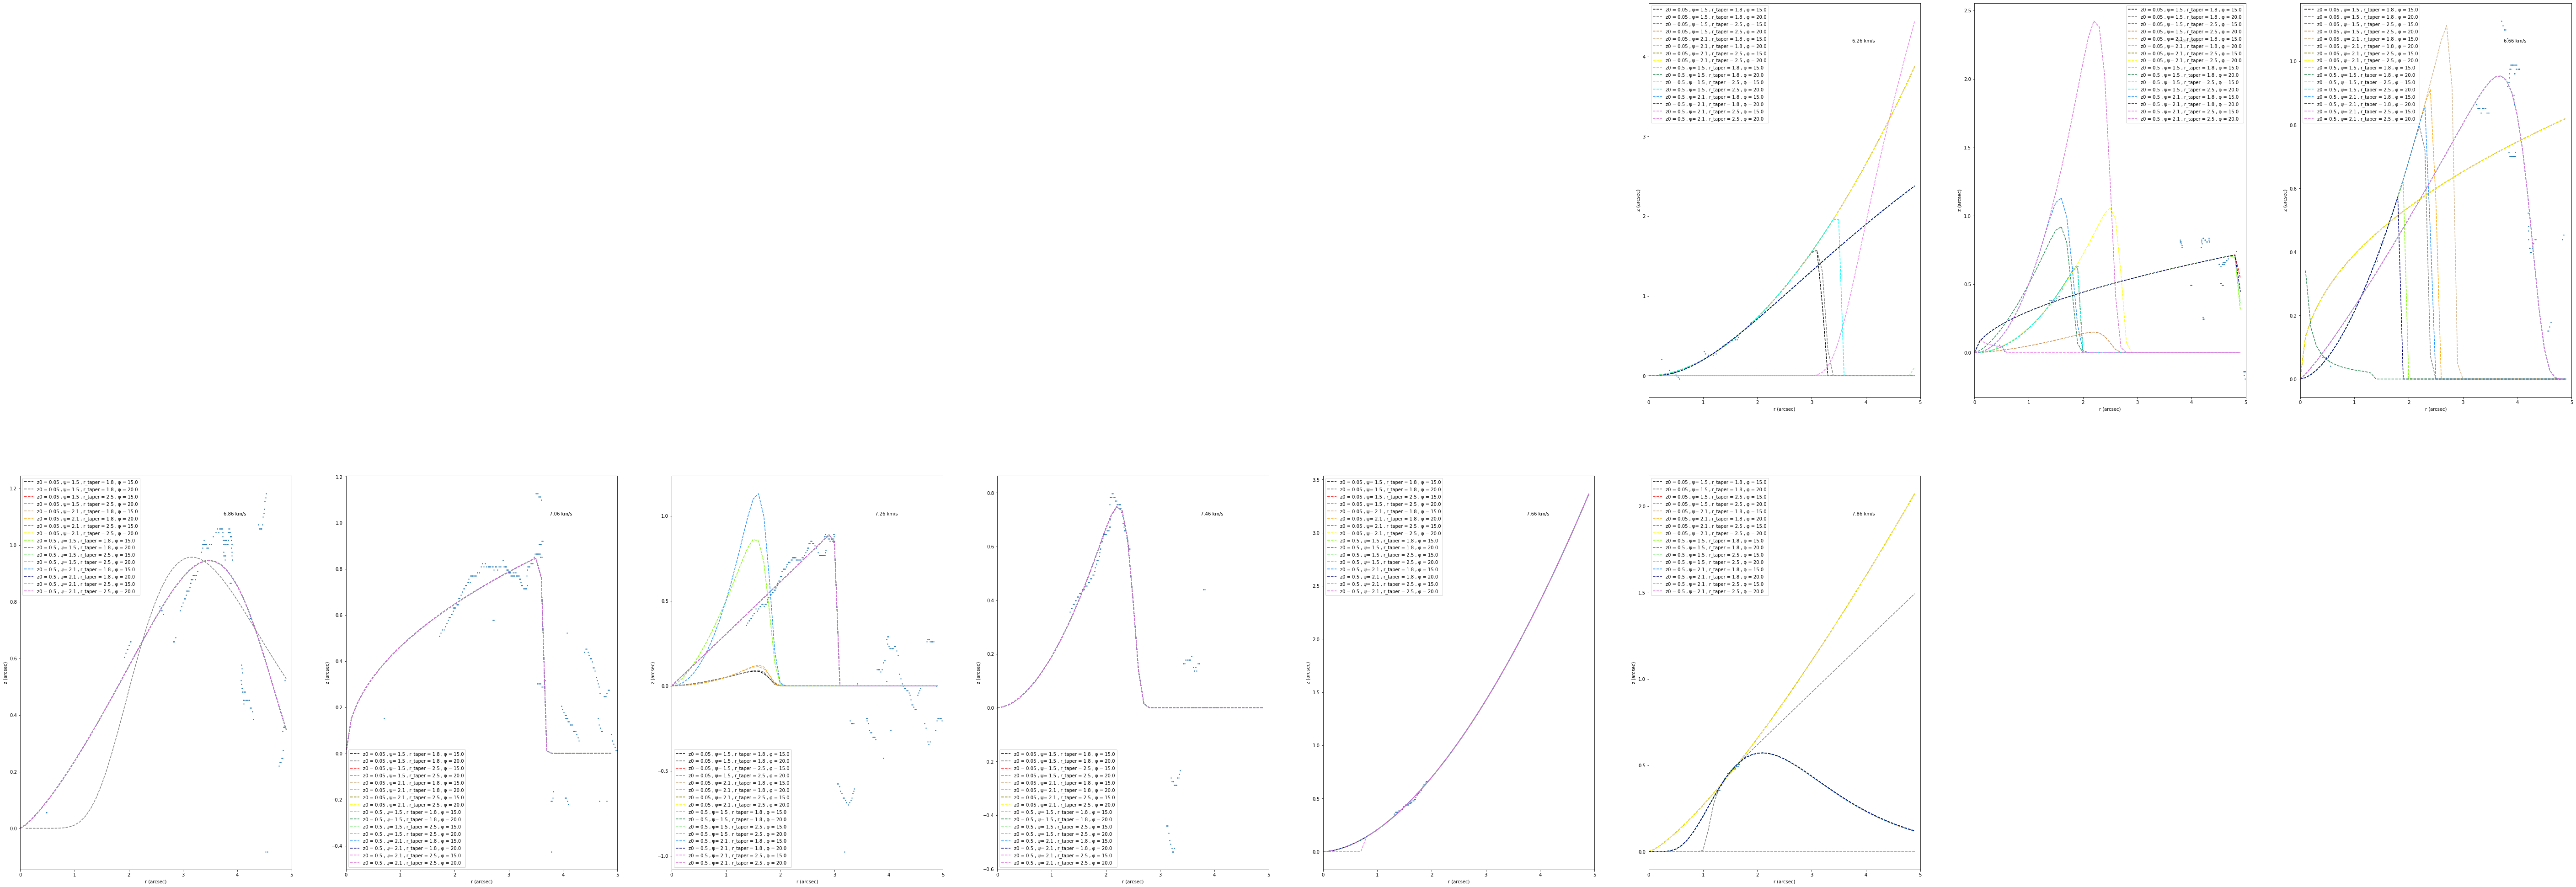

In [44]:
best_fit_curve_and_datapoints(path_4, r, z0_4, Psi_4, r_taper_4, Phi_4, color_array)